In [2]:
%matplotlib widget

import h5py
from skimage.measure import find_contours
from skimage.draw import polygon2mask
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import cv2

In [3]:
mouse = "cfm002mjr"
date = 240510
rec = 'meas01'

denoised_path = "N:/GEVI_Wave/Analysis/Visual/" + mouse + "/20" + str(date) + "/" + rec + '/cG_unmixed_dFF_denoised_2.h5'

with h5py.File(denoised_path, 'r') as mov_file:
    specs = mov_file["specs"]
    fps = specs['fps'][()][0][0][0]
    raw_mask = specs["extra_specs"]["mask"][()][0]
    binning = specs["binning"][()][0][0][0]  # Extract binning factor

    mov = mov_file['mov'][()]
    

In [4]:
def mask_movie(movie, raw_mask, binning):
    mask = cv2.resize(raw_mask, (0, 0), fx=1/binning, fy=1/binning,
                      interpolation=cv2.INTER_LINEAR)
    movie_size = movie.shape[1:3]
    mask = mask[:movie_size[0], :movie_size[1]].astype(bool)
    
    # Broadcast mask to movie shape
    mask = mask[None, :, :]  # if movie is (t, y, x)
    
    out = movie.astype(float).copy()
    out[:, ~mask[0]] = np.nan
    return out

mov = np.flip(mov, axis=1)
movie = np.nan_to_num(mov)
movie_masked = mask_movie(movie, raw_mask, binning)

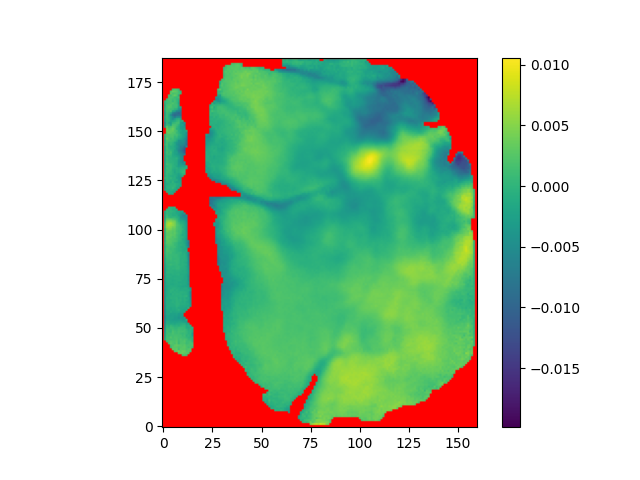

In [5]:
frame = movie_masked[100]  # pick a frame (assuming movie is (t, y, x))
cmap = plt.cm.viridis.copy()   # or any colormap you like
cmap.set_bad(color='red')      # NaNs will be red

plt.imshow(frame, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

In [6]:
movie_clip = movie_masked[round(312*fps):round(314.5*fps)]

In [7]:
np.save("wave_clip_masked.npy", movie_clip)